# Descriptive Statistics Review

In this second part of the lab, we are going to continue working with the data that we cleaned in the last part. 
Be sure to continue to write clean code and comment your work well!

First, lets import our libraries and the data we saved. 

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
diamonds = pd.read_csv('diamonds_clean.csv')
diamonds = diamonds.drop('Unnamed: 0', axis=1)

Now that we cleaned our data, we can proceed with some exploratory analysis. We will analyze the features that affect price the most.

Let's start by looking at how the charateristics of a diamond (especially the price, since that's our focus) change based on its color. Remember that you can use the `groupby()` method in pandas. 

**Using the `describe()` method, take a look on the dataset paying special attention to the variability. Comment what you see.**

In [3]:
#your code here
diamonds.describe()

Unnamed: 0.1         carat         depth         table         price  \
count   53932.00000  53932.000000  53932.000000  53932.000000  53932.000000   
mean    26970.48804      0.797879     61.749336     57.457029   3932.136079   
std     15571.46971      0.473986      1.432514      2.234064   3988.734835   
min         1.00000      0.200000     43.000000     43.000000    326.000000   
25%     13485.75000      0.400000     61.000000     56.000000    949.750000   
50%     26971.50000      0.700000     61.800000     57.000000   2401.000000   
75%     40455.25000      1.040000     62.500000     59.000000   5324.000000   
max     53940.00000      5.010000     79.000000     95.000000  18823.000000   

                  x             y             z  clarity_scale   color_scale  
count  53932.000000  53932.000000  53932.000000   53932.000000  53932.000000  
mean       5.732007      5.734142      3.539735       2.581436      3.405789  
std        1.119670      1.113276      0.692051       1.734951      1.701165  
min        3.730000      3.680000      1.070000       0.000000      0.000000  
25%        4.710000      4.720000      2.910000       1.000000      2.000000  
50%        5.700000      5.710000      3.530000       2.000000      3.000000  
75%        6.540000      6.540000      4.040000       4.000000      5.000000  
max       10.740000     19.278421      8.060000       7.000000      6.000000

#### Comment:

Price is still the most obvious outlier, carat might be, too. x,y,z also seem to have some outliers, but these were addressed in the previous exercise and might just be correct (it may just be a bigger diamond).

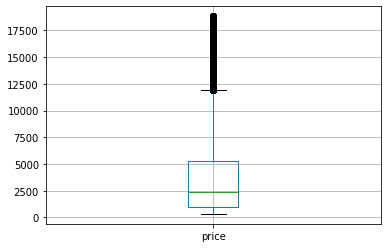

In [6]:
boxplot = diamonds.boxplot(column=['price'])

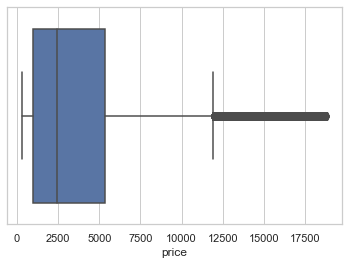

In [7]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(x=diamonds["price"])

Let's proceed to check each feature separately. 

**Before starting, which features do you think that will affect the price most and why? You will contrast your hypotheses with your results.**

#### Hypothesis:

I think carat, shape (so combination of depth, x, y, z, and table), and potentially color and clarity. I'd guess clarity more so, judging from the difference between max and 75% (it seems whatever diamond(s) pull up the max price may also just have higher values in x,y,z, etc.

## 1. The `color` column
First, let's look at the color column.

**For each different color, find the mean of each column. You should have a matrix with every color as rows and the columns `carat`, `clarity`, etc as columns.**

In [8]:
#your code here
diamonds.groupby('color').agg('mean')

Unnamed: 0.1     carat      depth      table        price         x  \
color                                                                        
D      28119.444937  0.657715  61.698066  57.404355  3168.106436  5.417851   
E      28791.322139  0.657867  61.662090  57.491201  3076.752475  5.411580   
F      27621.585177  0.736509  61.694087  57.433148  3725.091938  5.616727   
G      27726.789637  0.771088  61.757449  57.288060  3998.145173  5.678549   
H      24587.229704  0.911627  61.836557  57.518176  4484.958805  5.984776   
I      24951.123202  1.026927  61.846385  57.577278  5091.874954  6.222826   
J      23538.721866  1.162137  61.887215  57.812393  5323.818020  6.519338   

              y         z  clarity_scale  color_scale  
color                                                  
D      5.421928  3.343320       2.282846          6.0  
E      5.416949  3.337767       2.464122          5.0  
F      5.620529  3.465938       2.623545          4.0  
G      5.681198  3.507966       2.824358          3.0  
H      5.981484  3.699147       2.567695          2.0  
I      6.222728  3.846369       2.627444          1.0  
J      6.518130  4.033251       2.543091          0.0

**What do you see? Pay special attention to the relationship between price and color.**

Difference in mean price between D-class color and J-class color is substantial (2155.71). However, between D and E, the mean price actually goes down. Looking at the table column, it also doesn't appear to have a continuous growth (between E and F it goes down). I don't think color is the most important factor.

Let's go further into the color feature. We will plot the frequency distribution of the diamonds color in our dataset. 

**Plot the distribution and analyze it. Remember that you can use the pandas `plot()` method.**

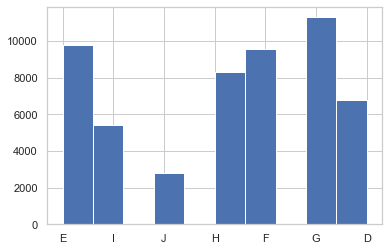

In [18]:
#your code here
diamonds['color'].hist()

Most frequently ocurring color class is G, then E, then F, H, D, I, and finally J. 

## 2.The `carat` column 

Let's check the `carat` (weight), since this could also be a potential factor for price change.

**Find the mean of each column for each value of `carat` using the `groupby` method. Then comment your results.**

In [19]:
#your code here
diamonds.groupby('carat').agg('mean')

Unnamed: 0.1      depth      table         price          x          y  \
carat                                                                           
0.20   28965.166667  61.100000  59.333333    365.166667   3.786667   3.753333   
0.21   34659.000000  60.511111  58.444444    380.222222   3.874444   3.837778   
0.22    6948.600000  61.620000  60.400000    391.400000   3.898000   3.848000   
0.23   35756.993174  61.426621  58.034130    486.143345   3.946382   3.973379   
0.24   31885.330709  61.599213  57.488189    505.185039   3.990157   4.019331   
...             ...        ...        ...           ...        ...        ...   
4.00   26445.000000  63.300000  58.000000  15984.000000  10.010000   9.940000   
4.01   25999.500000  61.750000  61.500000  15223.000000  10.080000  10.014754   
4.13   27131.000000  64.800000  61.000000  17329.000000  10.000000   9.850000   
4.50   27631.000000  65.800000  58.000000  18531.000000  10.230000  10.195532   
5.01   27416.000000  65.500000  59.000000  18018.000000  10.740000  10.572977   

              z  clarity_scale  color_scale  
carat                                        
0.20   2.303333       2.833333     5.166667  
0.21   2.332222       2.666667     5.444444  
0.22   2.386000       2.600000     4.800000  
0.23   2.431468       2.614334     4.518771  
0.24   2.465591       3.161417     4.185039  
...         ...            ...          ...  
4.00   6.310000       0.000000     1.000000  
4.01   6.205000       0.000000     0.500000  
4.13   6.430000       0.000000     2.000000  
4.50   6.720000       0.000000     0.000000  
5.01   6.980000       0.000000     0.000000  

[273 rows x 9 columns]


**Plot a histogram of the `carat` column by using the `plot` method (see the docs to find an easy way to do so). What is happening?**

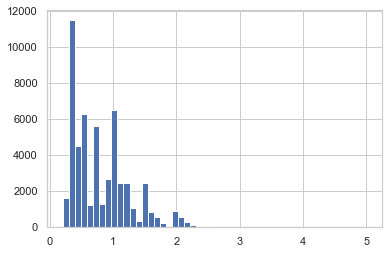

In [26]:
#your code here
diamonds['carat'].hist(bins=50)

In [27]:
import plotly.express as px
fig = px.histogram(diamonds, x="carat")
fig.show()

Carat 0.3-0.31 is the most occurring by far (count 4853). 1-1.01 is second, then 0.7-0.71.

# 3. The `table` and `clarity` column
Finally, let's check the `table`.

**Find the mean of each column for each value of `table` using the `groupby` method. Then comment your results.**

In [28]:
#your code here
diamonds.groupby('table').agg('mean')

Unnamed: 0.1   carat  depth    price      x      y      z  \
table                                                              
43.0       11369.00  1.0400  62.90   4997.0  6.450  6.410  4.040   
44.0       35634.00  0.2900  62.80    474.0  4.200  4.240  2.650   
49.0       14341.00  0.6500  64.25   2290.5  5.355  5.320  3.425   
50.0       16299.50  1.5100  61.50   8995.5  7.380  7.295  4.510   
50.1        3239.00  0.9400  66.00   3353.0  6.130  6.170  4.060   
...             ...     ...    ...      ...    ...    ...    ...   
71.0       44939.00  0.6800  58.00   1633.0  5.850  5.700  3.350   
73.0       51622.75  0.6025  68.90   2406.5  5.520  5.465  3.745   
76.0       51343.00  0.7900  65.30   2362.0  5.520  5.130  3.350   
79.0       50774.00  0.8100  68.80   2301.0  5.260  5.200  3.580   
95.0       24933.00  2.0100  58.60  13387.0  8.320  8.310  4.870   

       clarity_scale  color_scale  
table                              
43.0            4.00          1.0  
44.0            4.00          5.0  
49.0            3.00          3.0  
50.0            2.00          3.0  
50.1            1.00          2.0  
...              ...          ...  
71.0            2.00          3.0  
73.0            3.25          4.5  
76.0            2.00          3.0  
79.0            1.00          4.0  
95.0            2.00          4.0  

[127 rows x 9 columns]

Okay so this does not make a clear progression in terms of pricing. I think it has to do with shape rather than the value itself. It's a dimension.

**Finally, do the same with the `clarity` column.**

In [30]:
#your code here
diamonds.groupby('clarity_scale').agg('mean')

Unnamed: 0.1     carat      depth      table        price  \
clarity_scale                                                              
0              30187.213880  0.683949  61.800379  57.188169  3365.459101   
1              21448.339826  1.077602  61.771567  57.926823  5062.267356   
2              25585.839112  0.850482  61.853042  57.662541  3996.001148   
3              27833.538267  0.763850  61.724249  57.418040  3924.166204   
4              27934.582987  0.727108  61.667968  57.313966  3839.144308   
6              32403.857417  0.503131  61.624521  56.883881  2519.512315   
7              33591.562011  0.505123  61.510615  56.507207  2864.839106   

                      x         y         z  color_scale  
clarity_scale                                             
0              5.415302  5.420633  3.349481     3.492853  
1              6.404157  6.395579  3.952642     3.469967  
2              5.888383  5.888256  3.640636     3.448450  
3              5.658633  5.659782  3.492788     3.494370  
4              5.572860  5.580017  3.437925     3.161812  
6              4.961721  4.976437  3.062132     3.350848  
7              4.968402  4.989827  3.061659     3.101676

In terms of price, same as table: not an obvious growth in price as the clarity increases. Clarity scale 1, for example, has the highest mean price. It also has the highest carat, as well as the highest values for x, y, and z. 

**After looking at your results, which features do you think will affect price the most now? Regarding your hypotheses, do they match your final results? Provide a small overview.**

In [31]:
diamonds.corr()

Unnamed: 0.1     carat     depth     table     price         x  \
Unnamed: 0.1       1.000000 -0.378014 -0.034917 -0.100921 -0.306920 -0.406249   
carat             -0.378014  1.000000  0.028221  0.181658  0.921610  0.977765   
depth             -0.034917  0.028221  1.000000 -0.295700 -0.010670 -0.025097   
table             -0.100921  0.181658 -0.295700  1.000000  0.127165  0.196130   
price             -0.306920  0.921610 -0.010670  0.127165  1.000000  0.887227   
x                 -0.406249  0.977765 -0.025097  0.196130  0.887227  1.000000   
y                 -0.406405  0.975724 -0.028546  0.189525  0.887764  0.997427   
z                 -0.408885  0.976256  0.096379  0.155810  0.881924  0.990827   
clarity_scale      0.122440 -0.219824 -0.047711 -0.099927 -0.095443 -0.229956   
color_scale        0.095078 -0.291447 -0.047300 -0.026511 -0.172569 -0.270780   

                      y         z  clarity_scale  color_scale  
Unnamed: 0.1  -0.406405 -0.408885       0.122440     0.095078  
carat          0.975724  0.976256      -0.219824    -0.291447  
depth         -0.028546  0.096379      -0.047711    -0.047300  
table          0.189525  0.155810      -0.099927    -0.026511  
price          0.887764  0.881924      -0.095443    -0.172569  
x              0.997427  0.990827      -0.229956    -0.270780  
y              1.000000  0.990382      -0.226594    -0.270219  
z              0.990382  1.000000      -0.232935    -0.274974  
clarity_scale -0.226594 -0.232935       1.000000    -0.050427  
color_scale   -0.270219 -0.274974      -0.050427     1.000000

I think carat is the most important in terms of price. Dimensional values (x, y, z) also have high correlation to price. 

# Bonus: taking a deeper look with plots and correlations

To take deeper look, we will use the `pairplot` method of `seaborn` library. This method plots a scatterplot for each pair of features and in the diagonal the distribution of the feature.

So if you have many features it will take a while, be careful!


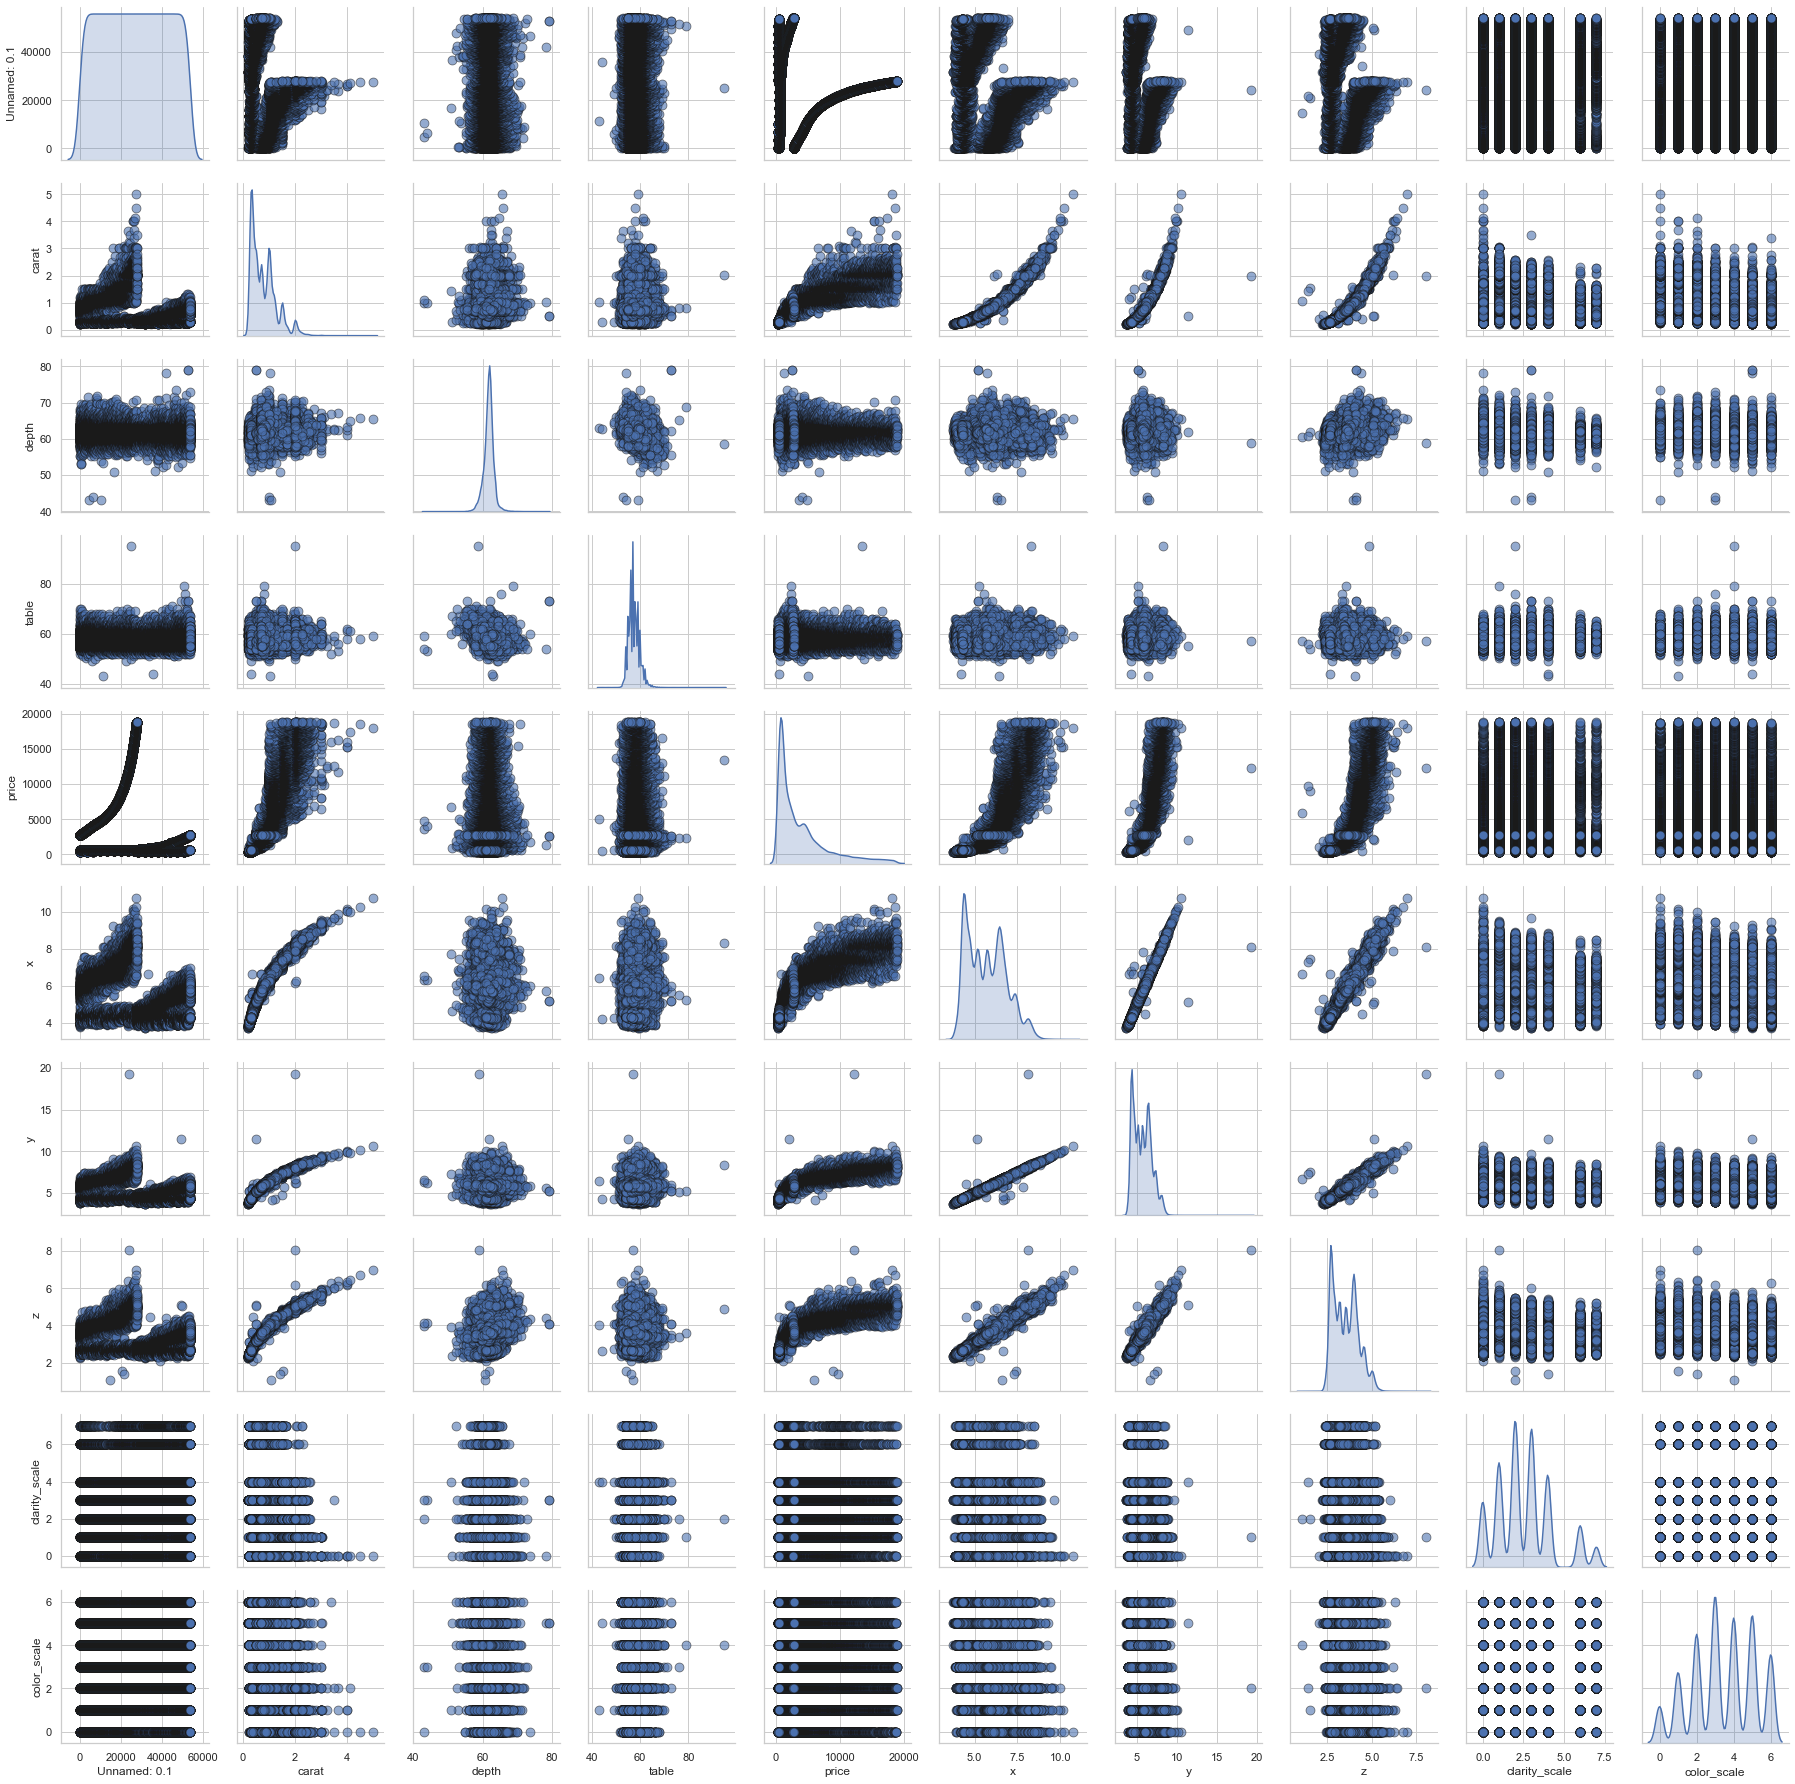

In [32]:
#Run this code
import seaborn as sns
sns.pairplot(diamonds, diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

**What do you see here? What relationships between variables are the most interesting?**

This is extremely difficult to read. 

Now we will see a correlation matrix with a plot. As you know a higher correlation means that the feature could be an effect (**but is not for sure**) for the changes on the price.

We will see this with a matrix with colors. A lighter color means greater correlation. 

This is done with the `seaborn` library as well.

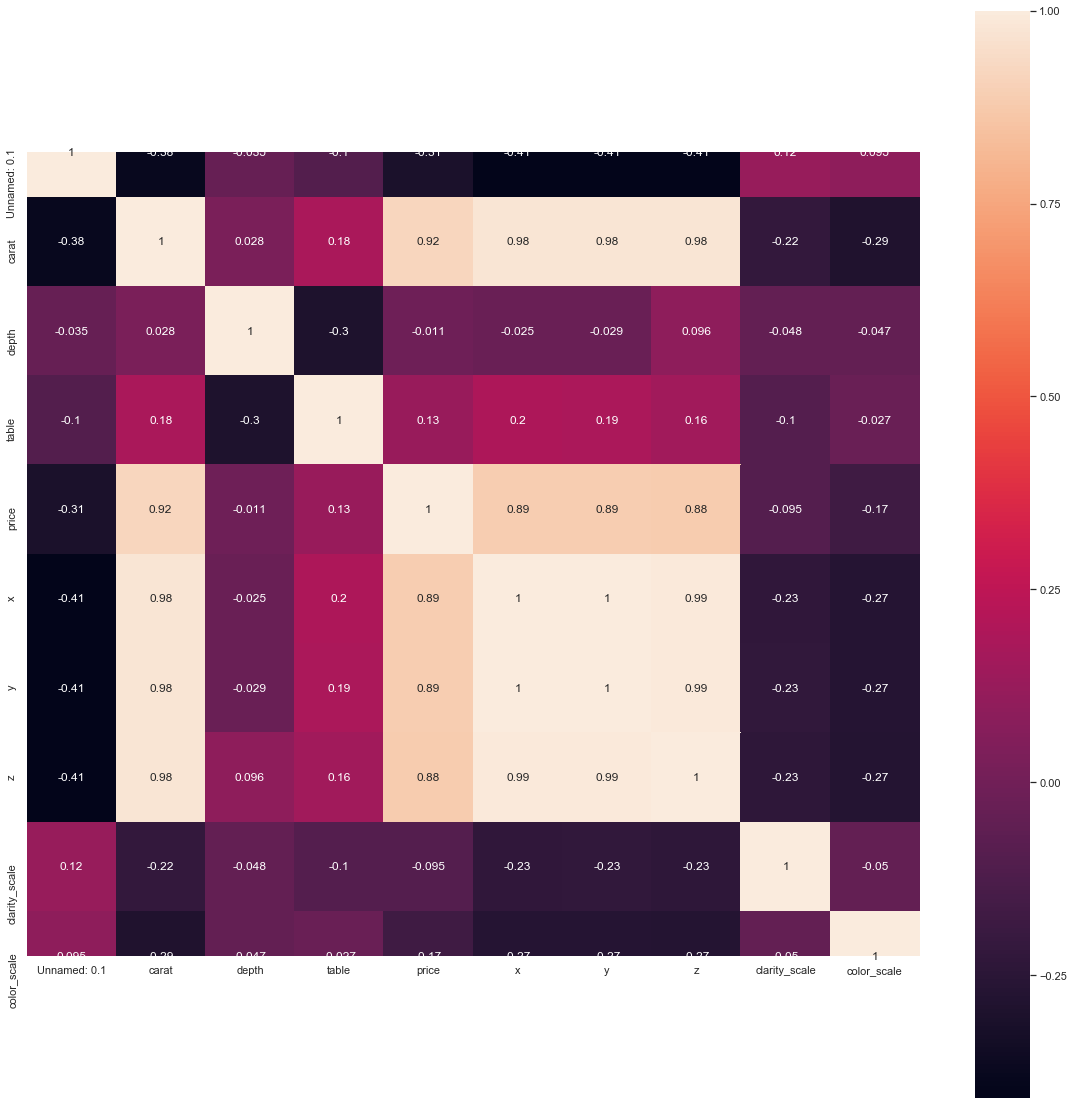

In [33]:
#Run this code
plt.figure(figsize=(20, 20))
p = sns.heatmap(diamonds.corr(), annot=True, square=True)

**What do you see here? Regarding the results before, does it fit with them?**

Carat has high correlation to x,y,z, as well as price (though the former group has greater correlation). Same as price, actually: x,y,z seem more important than carat, but only slightly. 

Finally, we will calculate the linear regression between the price and the weight. This will be done first by plotting it with the `seaborn` library and then calculating the error with the `scipy` library.

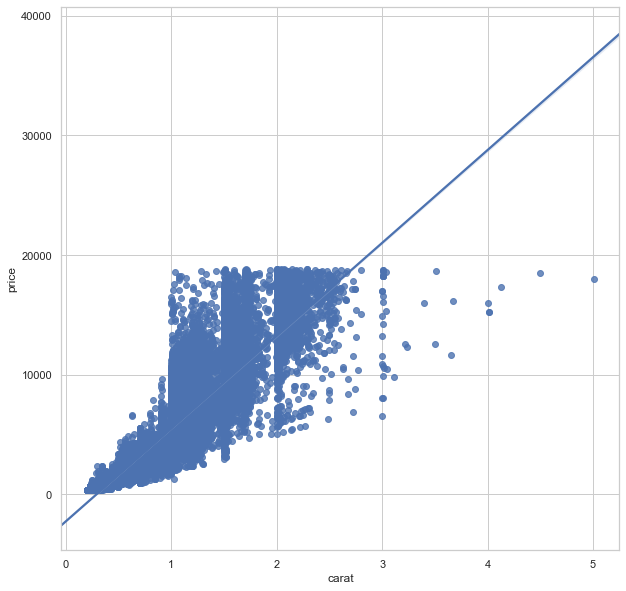

In [34]:
#Run this code
plt.figure(figsize=(10, 10))
sns.regplot(diamonds.carat, diamonds.price, scatter=True)


In [35]:
#Run this code
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(diamonds.carat, diamonds.price)
r2 = r_value ** 2
r2

0.8493658995804622

**What do you think?**

In [ ]:
#your thoughts here

**Would you do any other checks on other features? Do you have any comments regarding `carat`?**

In [ ]:
#your thoughts here

**Conlcusion**

**From our dataset** we can conclude that although `color` and `clarity` have a classification, and thus an assigned importance or weight, they do not influence the monetary value of a diamond in determining way. While it is true that different colors or clarities may have different prices, upon closer examination those variations in price seem to be linked to `carat` (weight) and its `dimensions`. In our analysis, the key factor to determining a diamond's value was placed solely in the aforementioned features, since we can see in our correlation coefficients and in the coefficient of determination that these features are closely related.